In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('/content/Credit card transactions - Project - 2.csv')



---


**TASK 1 :
Calculate the total spend for each city, then compute each city's percentage of the total spend. Sort cities by total spend and select the top 5.**

---





In [47]:
city_spends = df.groupby('City')['Amount'].sum().reset_index()

# Sort cities by spend in descending order and get the top 5 cities
top_cities = city_spends.sort_values(by='Amount', ascending=False).head(5)

# Calculate total spend
total_spend = df['Amount'].sum()

# Calculate percentage contribution of each city's spend to total spend
top_cities['Percentage Contribution'] = (top_cities['Amount'] / total_spend) * 100

# Print the result
print(top_cities)

                      City     Amount  Percentage Contribution
170  Greater Mumbai, India  576751476                14.153989
71        Bengaluru, India  572326739                14.045402
8         Ahmedabad, India  567794310                13.934172
126           Delhi, India  556929212                13.667533
267         Kolkata, India  115466943                 2.833660




---


**DIAGRAM FOR TASK 1**

<ipython-input-48-4215a49e84ee>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='City', y='Amount', palette='viridis')


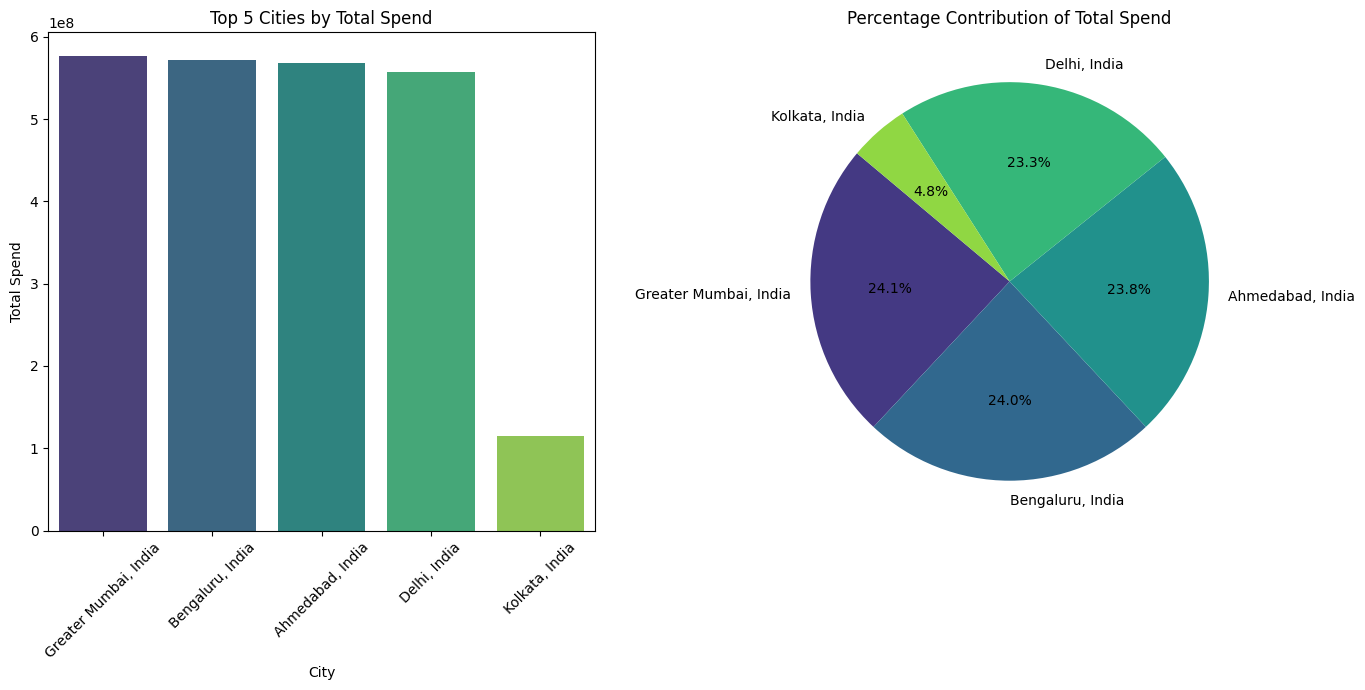

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame 'top_cities' has been prepared already

# Plotting Bar Plot for Total Spend
plt.figure(figsize=(14, 7))

# Bar plot for total spend
plt.subplot(1, 2, 1)
sns.barplot(data=top_cities, x='City', y='Amount', palette='viridis')
plt.title('Top 5 Cities by Total Spend')
plt.xlabel('City')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)

# Pie chart for percentage contribution
plt.subplot(1, 2, 2)
plt.pie(top_cities['Percentage Contribution'], labels=top_cities['City'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_cities)))
plt.title('Percentage Contribution of Total Spend')

plt.tight_layout()
plt.show()



---


**TASK 2 : Group data by card type and month, calculate total spend for each combination, and identify the month with the highest spend for each card type.**

---



In [49]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Extract month and year from 'Date'
df['Month'] = df['Date'].dt.to_period('M')

# Group by 'Card Type' and 'Month' and calculate total amount spent in each month
monthly_spend = df.groupby(['Card Type', 'Month'])['Amount'].sum().reset_index()

# For each 'Card Type', find the month with the highest spend
highest_spend_month = monthly_spend.loc[monthly_spend.groupby('Card Type')['Amount'].idxmax()]

# Print the result
print(highest_spend_month)

    Card Type    Month    Amount
15       Gold  2015-01  55455064
30   Platinum  2014-08  57936507
42  Signature  2013-12  58799522
77     Silver  2015-03  59723549




---
**DIAGRAM FOR TASK 2**



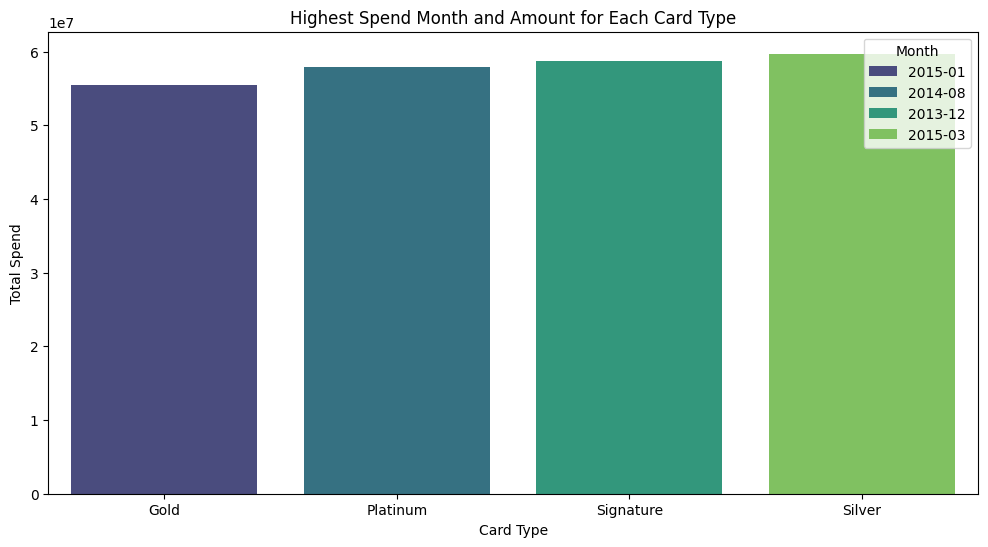

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame 'highest_spend_month' has been prepared already

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(data=highest_spend_month, x='Card Type', y='Amount', hue='Month', palette='viridis')

# Set the title and labels
plt.title('Highest Spend Month and Amount for Each Card Type')
plt.xlabel('Card Type')
plt.ylabel('Total Spend')

# Show the plot
plt.show()




---


**TASK 3 : For each card type, accumulate the spend amounts until it reaches 1,000,000, and record the transaction details where this threshold is first crossed.**


---



In [51]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Initialize a list to store the result
result = []

# Loop through each card type
for card_type in df['Card Type'].unique():
    # Filter the DataFrame for the current card type
    df_card = df[df['Card Type'] == card_type].sort_values(by='Date')

    # Calculate the cumulative spend
    df_card['Cumulative Spend'] = df_card['Amount'].cumsum()

    # Find the first row where cumulative spend reaches or exceeds 1,000,000
    target_row = df_card[df_card['Cumulative Spend'] >= 1000000].iloc[0]

    # Append the row to the result list
    result.append(target_row)

# Convert the result list to a DataFrame
result_df_1 = pd.DataFrame(result)

# Drop the 'Cumulative Spend' column as it's not needed in the final output
result_df_1 = result_df_1.drop(columns=['Cumulative Spend'])

# Print the result DataFrame
print(result_df_1)

       index                   City       Date  Card Type Exp Type Gender  \
141      141  Greater Mumbai, India 2013-10-04       Gold    Bills      F   
190      190       Ahmedabad, India 2013-10-05   Platinum    Bills      F   
15464  15464    Lakshmeshwar, India 2013-10-04     Silver    Bills      F   
50        50           Delhi, India 2013-10-04  Signature    Bills      F   

       Amount    Month  
141    990700  2013-10  
190    612572  2013-10  
15464   83905  2013-10  
50     735037  2013-10  




---


**TASK 4 : Filter transactions for 'Gold' card type, calculate total spend per city, determine the percentage of total 'Gold' spend by each city, and find the city with the lowest percentage.**


---



In [52]:
# Filter the DataFrame for 'Gold' card type
gold_df = df[df['Card Type'] == 'Gold']

# Calculate the total spend for 'Gold' card type
total_gold_spend = gold_df['Amount'].sum()

# Group by city and calculate total spend per city for 'Gold' card type
city_gold_spend = gold_df.groupby('City')['Amount'].sum().reset_index()

# Calculate the percentage spend per city
city_gold_spend['Percentage Spend'] = (city_gold_spend['Amount'] / total_gold_spend) * 100

# Find the city with the lowest percentage spend
lowest_percentage_spend_city = city_gold_spend.loc[city_gold_spend['Percentage Spend'].idxmin()]

# Print the result
print(lowest_percentage_spend_city)

City                Dhamtari, India
Amount                         1416
Percentage Spend           0.000144
Name: 99, dtype: object




---
**DIAGRAM FOR TASK 4**


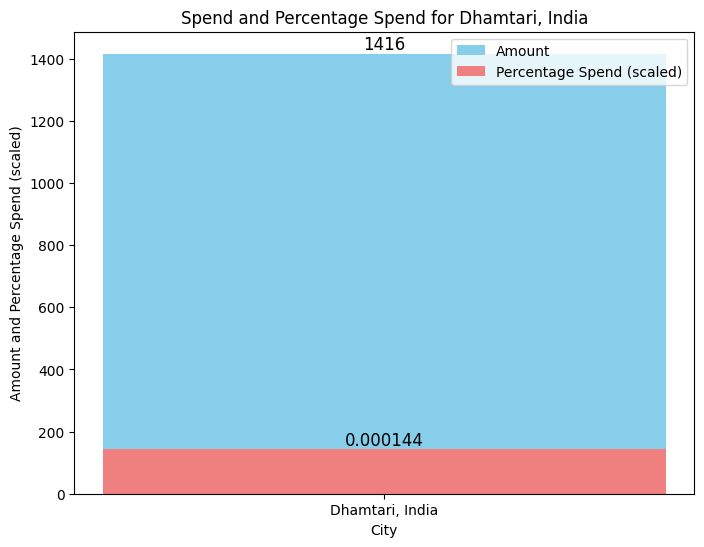

In [53]:
import matplotlib.pyplot as plt

# Data for the specific city
data = {
    'City': ['Dhamtari, India'],
    'Amount': [1416],
    'Percentage Spend': [0.000144]
}

# Create a DataFrame for plotting
plot_df = pd.DataFrame(data)

# Set up the figure and axis
plt.figure(figsize=(8, 6))

# Bar plot for Amount and Percentage Spend
plt.bar(plot_df['City'], plot_df['Amount'], label='Amount', color='skyblue')
plt.bar(plot_df['City'], plot_df['Percentage Spend'] * 1e6, label='Percentage Spend (scaled)', color='lightcoral')

# Add annotations to show the exact values
plt.text(0, plot_df['Amount'].values[0], f"{plot_df['Amount'].values[0]}", ha='center', va='bottom', fontsize=12)
plt.text(0, plot_df['Percentage Spend'].values[0] * 1e6, f"{plot_df['Percentage Spend'].values[0]:.6f}", ha='center', va='bottom', fontsize=12)

# Set the title and labels
plt.title('Spend and Percentage Spend for Dhamtari, India')
plt.xlabel('City')
plt.ylabel('Amount and Percentage Spend (scaled)')
plt.legend()

# Show the plot
plt.show()




---


**TASK 5 : Calculate the total spend for each card type and expense type for January 2014 and December 2013, compute the month-over-month growth, and identify the combination with the highest growth.**


---



In [54]:
city_expense_spend = df.groupby(['City', 'Exp Type'])['Amount'].sum().reset_index()

# Initialize a list to store the result
result = []

# Loop through each city
for city in city_expense_spend['City'].unique():
    # Filter the DataFrame for the current city
    city_df = city_expense_spend[city_expense_spend['City'] == city]

    # Find the highest and lowest expense type
    highest_expense_type = city_df.loc[city_df['Amount'].idxmax(), 'Exp Type']
    lowest_expense_type = city_df.loc[city_df['Amount'].idxmin(), 'Exp Type']

    # Append the city, highest_expense_type, and lowest_expense_type to the result list
    result.append({'City': city, 'Highest Expense Type': highest_expense_type, 'Lowest Expense Type': lowest_expense_type})

# Convert the result list to a DataFrame
result_df = pd.DataFrame(result)

# Print the result DataFrame
print(result_df)

                 City Highest Expense Type Lowest Expense Type
0     Achalpur, India              Grocery       Entertainment
1     Adilabad, India                Bills                Food
2    Adityapur, India                 Food             Grocery
3        Adoni, India                Bills       Entertainment
4        Adoor, India                 Fuel               Bills
..                ...                  ...                 ...
981    Zaidpur, India                 Food               Bills
982    Zamania, India        Entertainment                Fuel
983       Zira, India        Entertainment             Grocery
984   Zirakpur, India                 Fuel       Entertainment
985  Zunheboto, India              Grocery       Entertainment

[986 rows x 3 columns]




---


**TASK 6 : Filter transactions that occurred on weekends, compute the total spend and number of transactions for each city, and find the city with the highest ratio of spend to transactions.**

---



In [55]:

# Calculate total spend for each expense type
total_spend_by_expense = df.groupby('Exp Type')['Amount'].sum().reset_index()
total_spend_by_expense.columns = ['Exp Type', 'Total Spend']

# Filter the DataFrame for female transactions
female_spend_df = df[df['Gender'] == 'F']

# Calculate total spend by females for each expense type
female_spend_by_expense = female_spend_df.groupby('Exp Type')['Amount'].sum().reset_index()
female_spend_by_expense.columns = ['Exp Type', 'Female Spend']

# Merge the total spend and female spend DataFrames
merged_df = pd.merge(total_spend_by_expense, female_spend_by_expense, on='Exp Type')

# Calculate the percentage contribution of spends by females for each expense type
merged_df['Percentage Contribution'] = (merged_df['Female Spend'] / merged_df['Total Spend']) * 100

# Print the result
print(merged_df[['Exp Type', 'Percentage Contribution']])

        Exp Type  Percentage Contribution
0          Bills                63.945879
1  Entertainment                49.372908
2           Food                54.905311
3           Fuel                49.710381
4        Grocery                50.911023
5         Travel                51.132870




---

**DIAGRAM FOR TASK 6**

<ipython-input-56-5773fdc94738>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x='Exp Type', y='Percentage Contribution', palette='viridis')


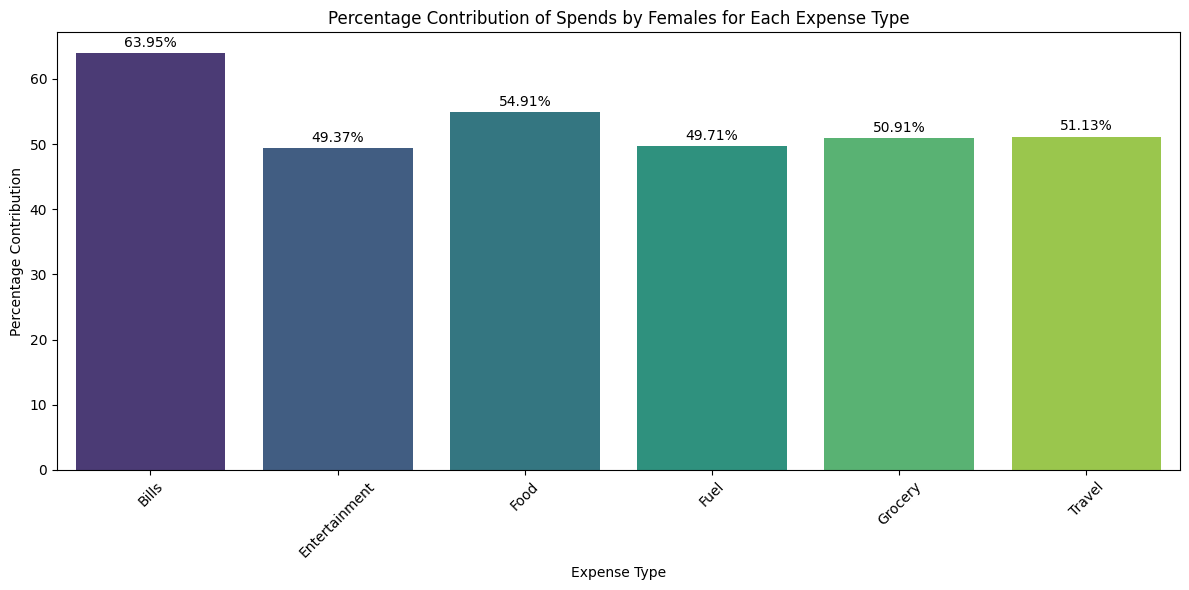

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the DataFrame is named 'merged_df'
# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Create a bar plot for the percentage contribution by females for each expense type
sns.barplot(data=merged_df, x='Exp Type', y='Percentage Contribution', palette='viridis')

# Add annotations to show the exact percentage on each bar
for index, row in merged_df.iterrows():
    plt.text(index, row['Percentage Contribution'] + 0.5, f'{row["Percentage Contribution"]:.2f}%',
             ha='center', va='bottom', fontsize=10)

# Set the title and labels
plt.title('Percentage Contribution of Spends by Females for Each Expense Type')
plt.xlabel('Expense Type')
plt.ylabel('Percentage Contribution')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()




---


**TASK 7 : For each city, calculate the number of days from the first transaction to the 500th transaction, and identify the city with the shortest duration.**

---



In [57]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Filter for January 2014 and December 2013
df_jan_2014 = df[(df['Date'].dt.year == 2014) & (df['Date'].dt.month == 1)]
df_dec_2013 = df[(df['Date'].dt.year == 2013) & (df['Date'].dt.month == 12)]

# Group by 'Card Type' and 'Exp Type' and calculate total spend for each combination for January 2014 and December 2013
jan_2014_spend = df_jan_2014.groupby(['Card Type', 'Exp Type'])['Amount'].sum().reset_index()
dec_2013_spend = df_dec_2013.groupby(['Card Type', 'Exp Type'])['Amount'].sum().reset_index()

# Rename columns for merging
jan_2014_spend.columns = ['Card Type', 'Exp Type', 'Jan 2014 Spend']
dec_2013_spend.columns = ['Card Type', 'Exp Type', 'Dec 2013 Spend']

# Merge January 2014 and December 2013 spends on 'Card Type' and 'Exp Type'
merged_spend = pd.merge(jan_2014_spend, dec_2013_spend, on=['Card Type', 'Exp Type'], how='inner')

# Calculate the month-over-month growth
merged_spend['MoM Growth'] = merged_spend['Jan 2014 Spend'] - merged_spend['Dec 2013 Spend']

# Find the combination with the highest month-over-month growth
highest_growth = merged_spend.loc[merged_spend['MoM Growth'].idxmax()]

# Print the result
print(highest_growth[['Card Type', 'Exp Type', 'MoM Growth']])

Card Type     Platinum
Exp Type       Grocery
MoM Growth     4498781
Name: 10, dtype: object




---


**TASK 8 : Filter transactions by gender to include only females, calculate the total spend by females and overall for each expense type, and compute the percentage contribution of female spends.**

---



In [58]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Filter for weekends (Saturday and Sunday)
df_weekends = df[df['Date'].dt.dayofweek >= 5]

# Group by city and calculate total spend and total number of transactions for weekends
city_weekend_stats = df_weekends.groupby('City').agg(
    Total_Spend=('Amount', 'sum'),
    Total_Transactions=('Amount', 'size')
).reset_index()

# Calculate the spend to transaction ratio for each city
city_weekend_stats['Spend_to_Transaction_Ratio'] = city_weekend_stats['Total_Spend'] / city_weekend_stats['Total_Transactions']

# Find the city with the highest spend to transaction ratio
highest_ratio_city = city_weekend_stats.loc[city_weekend_stats['Spend_to_Transaction_Ratio'].idxmax()]

# Print the result
print(highest_ratio_city[['City', 'Spend_to_Transaction_Ratio']])

City                          Sonepur, India
Spend_to_Transaction_Ratio          299905.0
Name: 657, dtype: object




---


**TASK 9 :  Calculate the total spend for each card type and expense type in January 2014 and December 2013, compute the growth from December 2013 to January 2014, and find the combination with the highest growth.**


---



In [59]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Initialize a list to store the results
results = []

# Loop through each city
for city in df['City'].unique():
    # Filter the DataFrame for the current city
    city_df = df[df['City'] == city].sort_values(by='Date')

    # Find the first transaction date
    first_transaction_date = city_df['Date'].iloc[0]

    # Calculate the cumulative count of transactions
    city_df['Cumulative_Transactions'] = city_df.groupby('City').cumcount() + 1

    # Find the row where the cumulative transaction count reaches 500
    if len(city_df) >= 500:
        transaction_500_date = city_df[city_df['Cumulative_Transactions'] == 500]['Date'].iloc[0]
        # Calculate the number of days to reach 500 transactions
        days_to_500 = (transaction_500_date - first_transaction_date).days

        # Append the city and days to results
        results.append({'City': city, 'Days_to_500': days_to_500})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Find the city with the least number of days to reach 500 transactions
city_least_days = results_df.loc[results_df['Days_to_500'].idxmin()]

# Print the result
print(city_least_days[['City', 'Days_to_500']])

City           Bengaluru, India
Days_to_500                  81
Name: 2, dtype: object




---
**EXPORT DATA**


---



In [60]:
!pip install xlsxwriter

In [61]:
import pandas as pd

# Define file name
file_name = 'project_data.xlsx'

# Create an Excel writer object
with pd.ExcelWriter(file_name, engine='xlsxwriter') as writer:
    # Write each DataFrame to a different sheet
    top_cities.to_excel(writer, sheet_name='Top Cities', index=False)
    highest_spend_month.to_excel(writer, sheet_name='Highest Spend Month', index=False)
    result_df_1.to_excel(writer, sheet_name='Expense Type Analysis', index=False)
    lowest_percentage_spend_city.to_excel(writer, sheet_name='Lowest Percentage Spend City', index=False)
    result_df.to_excel(writer, sheet_name='City Expense', index=False)
    merged_df.to_excel(writer, sheet_name='Female Spend Percentage', index=False)
    highest_growth.to_frame().T.to_excel(writer, sheet_name='Highest Growth', index=False)
    highest_ratio_city.to_frame().T.to_excel(writer, sheet_name='Highest Ratio City', index=False)
    city_least_days.to_frame().T.to_excel(writer, sheet_name='City Least Days', index=False)

print(f'Data exported to {file_name}')


Data exported to project_data.xlsx
